<a href="https://colab.research.google.com/github/JulieCarpenter/Convolutional-Neural-Network/blob/main/CLL_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Packages

In [31]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, array_to_img
from tensorflow.keras.utils import to_categorical

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load the Data


### Populate the train and test datasets

In [32]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Verify successful load

In [33]:
print(X_train.shape) # Expecting 60,000 records of size 28 x 28
print(y_train.shape) # Expecting 60,000 records
print(X_test.shape)  # Expecting 10,000 records of size 28 x 28
print(y_test.shape)  # Expecting 10,000 records

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### Explore the image data

In [34]:
X_train[0].shape  # Expecting 28 x 28 as above

(28, 28)

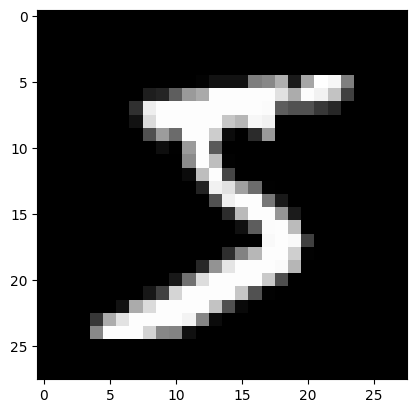

In [35]:
plt.imshow(X_train[0], cmap="gray");  # Show first image

In [36]:
y_train[0] # Expecting 5 as previous image suggests

5

### Process the image data

#### Preprocess the independent features

In [37]:
image_height, image_width = 28, 28  # Set variables height & width to 28 for preprocessing the images

In [38]:
X_train = X_train.reshape(60000, image_height*image_width) # Reformat from 28x28 to single layer (784 pixles(neurons))
print(X_train.shape)
X_test = X_test.reshape(10000, image_height*image_width)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [39]:
print(X_train[0])  # Verify greyscale (0-255)
X_train = X_train.astype('float32') # Convert to float for next step
print(X_test[0])  # Verify greyscale (0-255)
X_test = X_test.astype('float32')

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [40]:
X_train /= 255.0  # Transform X values from 0-255 to 0-1
X_test /= 255.0
print(X_train[0]) # Verify

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

#### Preprocess the target output

In [41]:
print(y_train.shape) # Verify y has one dimentional shape
print(y_test.shape)

(60000,)
(10000,)


In [42]:
y_train = to_categorical(y_train, 10) # Categorize each digit to a bin
print(y_train.shape)
y_test = to_categorical(y_test, 10) # Classify 10 digits to 10 bins
print(y_test.shape)

(60000, 10)
(10000, 10)


## Build a Neural Network Model

In [43]:
model = Sequential() # Instantiate a sequential model

In [44]:
model.add(Dense(512, activation='relu', input_shape=(784,))) # Create first layer of model
model.add(Dense(512, activation='relu')) # Create second layer of model
model.add(Dense(10, activation='softmax'))

## Compile the model

In [45]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # adam is algorithm used, categorical_crossentropy allows our 10 bins
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
784*512+512 # pixels(input) * nodes + bias = Param # for first layer

401920

In [47]:
512*512+512 # input nodes * nodes + bias = Param # for second layer (input now 512)

262656

In [48]:
512*10+10 # input nodes * nodes + bias = Param # for final layer

5130

## Train the model

In [49]:
fit_model = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 22s 11ms/step - loss: 0.1847 - accuracy: 0.9423 - val_loss: 0.0964 - val_accuracy: 0.9703
Epoch 2/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0797 - accuracy: 0.9754 - val_loss: 0.0728 - val_accuracy: 0.9785
Epoch 3/20
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0540 - accuracy: 0.9830 - val_loss: 0.0773 - val_accuracy: 0.9775
Epoch 4/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0412 - accuracy: 0.9868 - val_loss: 0.0895 - val_accuracy: 0.9751
Epoch 5/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0348 - accuracy: 0.9890 - val_loss: 0.0796 - val_accuracy: 0.9807
Epoch 6/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0296 - accuracy: 0.9908 - val_loss: 0.0837 - val_accuracy: 0.9799
Epoch 7/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0220 - accuracy: 0.9928 - val_loss: 0.0919 -

## Evaluate accuracy

### Plot the accuracy of the model

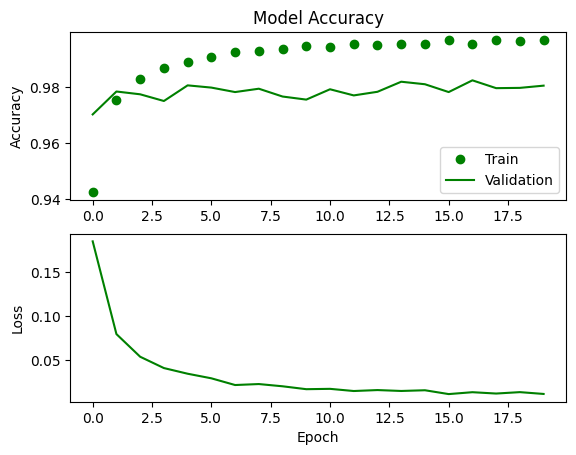

In [65]:
plt.subplot(211)
plt.plot(fit_model.history['accuracy'], 'go', fit_model.history['val_accuracy'], 'g-')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.subplot(212)
plt.plot(fit_model.history['loss'], 'g-')
plt.ylabel('Loss')
plt.xlabel('Epoch')


plt.show()

### Evaluate the model

In [66]:
score = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1430 - accuracy: 0.9806
